<a href="https://colab.research.google.com/github/jagadesh154/nlp/blob/main/ms%5E2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio==0.8.2 -f https://dow
!pip install datasets
!pip install transformers
!pip install rouge
!pip install accelerate -U

Looking in links: https://dow
ERROR: Could not find a version that satisfies the requirement torch==1.8.2+cu111 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1)
ERROR: No matching distribution found for torch==1.8.2+cu111
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 4.5 MB/s eta 0:00:00


In [2]:
import torch


In [3]:
from transformers import pipeline

In [4]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorForSeq2Seq, AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer

loading dataset

In [5]:
# Load the "ms2_sparse_max" dataset
ms2_dataset = load_dataset("allenai/ms2_sparse_max", split="test")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/14188 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2021 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1667 [00:00<?, ? examples/s]

In [6]:
# @title Default title text
ms2_dataset.to_pandas()

,review_id,pmid,title,abstract,target,background
0,24894943,"[19632716, 20573926, 23724913, 21903745]",[Radiotherapy plus chemotherapy with or withou...,[BACKGROUND Results from phase II studies in p...,,INTRODUCTION / BACKGROUND An individual patien...
1,25367179,"[19784660, 2390908, 16703429, 15496622, 179367...",[Effects of preoperative chemoradiotherapy on ...,[Purpose Deterioration of anorectal function a...,,Background Low rectal cancer is conventionally...
2,27841442,"[9550512, 12920254, 15929503, 19321521, 151942...",[Effect of a therapeutic intervention for the ...,[BACKGROUND AND PURPOSE Arm function recovery ...,,BACKGROUND Repetitive task training ( RTT ) in...
3,28764600,"[3527357, 4679833, 23842842, 4226213, 19250152...",[Internet-based psychoeducation for bipolar di...,[Background In a recent exploratory r and omis...,,There is a gap in knowledge of women 's percep...
4,26262909,"[15592289, 11110329, 10907623, 18768245, 13750...",[Sleep in late pregnancy predicts length of la...,[OBJECTIVE The purpose of this study was to te...,,BACKGROUND Leg cramps are a common problem in ...
...,...,...,...,...,...,...
1662,23881744,"[16263773, 9831573, 109596, 16615955, 19573436...",[Effect of intravenous amino acids on glutamin...,[Glutamine may be a conditionally essential am...,,BACKGROUND Observational studies in preterm ne...
1663,28780119,"[23402113, 19428896, 3196245, 16595307]",[Efficacy of a Recombinant HVT-H5 Vaccine Agai...,[SUMMARY . The swift evolution rate of avian i...,,Indonesia has implemented multiple strategies ...
1664,29724255,"[3355143, 5339014, 21548817, 27352492, 2062605...",[Acupuncture for the Treatment of Dry Eye: A M...,[Purpose To evaluate the effects of acupunctur...,,Abstract s Background In a former meta- analys...
1665,24756870,"[12971705, 12920254, 11812553, 22544817, 33492...",[A study on additional early physiotherapy aft...,[Objective : To investigate whether additional...,,BACKGROUND Various approaches to physical reha...


In [ ]:
# Access a specific table from the dataset (replace 'table_index' with the actual index)
table_index = 0  # Replace with the index of the table you want to access
table_data = ms2_dataset[table_index]

In [ ]:
import pandas as pd

In [ ]:
# Convert the table data to a Pandas DataFrame
df = pd.DataFrame(table_data)

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

In [ ]:
!pip install sentencepiece

In [ ]:
from transformers import T5Tokenizer

model_name = "t5-small"
model = T5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = T5Tokenizer.from_pretrained(model_name)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [ ]:
def generate_summary(input_text):
    input_ids = tokenizer.encode("summarize: " + input_text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = model.generate(input_ids, max_length=150, min_length=50, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

In [ ]:
print(ms2_dataset.features)

{'review_id': Value(dtype='string', id=None), 'pmid': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'title': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'abstract': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'target': Value(dtype='string', id=None), 'background': Value(dtype='string', id=None)}


In [ ]:
def process_item(item):
    abstracts = item['abstract']
    text_to_summarize = " ".join(abstracts)
    summary = generate_summary(text_to_summarize)
    return summary

In [ ]:
for i, summary in enumerate(summaries):
    print(f"Summary {i + 1}:\n{summary}\n")

Summary 1:
BACKGROUND Results from phase II studies in patients with stage T1 - 3pN2M0 non-small-cell lung cancer with ipsilateral mediastinal nodal metastases ( N2) showed the feasibility of resection after concurrent chemotherapy and radiotherapy followed by st and ard concurrent chemotherapy and definitive radiotherapy without resection.

Summary 2:
Purpose Deterioration of anorectal function after long-course preoperative chemoradiotherapy combined with surgery for rectal cancer is poorly defined. we conducted a prospect i ve study to evaluate the acute and long term effects of preoperative chemoradiotherapy on anorectal function and quality of life of the patients.

Summary 3:
BACKGROUND AND PURPOSE Arm function recovery is notoriously poor in stroke patients. The effect of treatment modalities, particularly those directed at improving upper limb function, has been studied primarily in chronic stroke patients. the purpose of this study was to investigate the effect of a specific t

In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24932 sha256=2217f03b34f27fc0883bbd6b699737816e4edd8e7e3a712a5fcaf3633e664b93
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer


In [ ]:
def calculate_rouge_scores(generated_summaries, reference_summaries):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_scores = {
        "rouge1": {"f": [], "p": [], "r": []},
        "rouge2": {"f": [], "p": [], "r": []},
        "rougeL": {"f": [], "p": [], "r": []}
    }

    for gen_summary, ref_summary in zip(generated_summaries, reference_summaries):
        scores = scorer.score(gen_summary, ref_summary)
        for rouge_type in rouge_scores.keys():
            rouge_scores[rouge_type]["f"].append(scores[rouge_type].fmeasure)
            rouge_scores[rouge_type]["p"].append(scores[rouge_type].precision)
            rouge_scores[rouge_type]["r"].append(scores[rouge_type].recall)

    return rouge_scores

In [ ]:
# Example usage
generated_summaries = ["Generated summary 1", "Generated summary 2", "Generated summary 3"]
reference_summaries = ["Reference summary 1", "Reference summary 2", "Reference summary 3"]

rouge_scores = calculate_rouge_scores(generated_summaries, reference_summaries)

average_rouge_scores = {}

for rouge_type, metrics in rouge_scores.items():
    average_rouge_scores[rouge_type] = {}
    for metric, values in metrics.items():
        avg_score = sum(values) / len(values)
        average_rouge_scores[rouge_type][metric] = avg_score


In [ ]:
print("Average ROUGE Scores for ROUGE-1:")
for metric, avg_score in average_rouge_scores["rouge1"].items():
    print(f"{metric}: {avg_score:.4f}")


Average ROUGE Scores for ROUGE-1:
f: 0.6667
p: 0.6667
r: 0.6667


In [ ]:
print("\nAverage ROUGE Scores for ROUGE-2:")
for metric, avg_score in average_rouge_scores["rouge2"].items():
    print(f"{metric}: {avg_score:.4f}")


Average ROUGE Scores for ROUGE-2:
f: 0.5000
p: 0.5000
r: 0.5000


In [ ]:
print("\nAverage ROUGE Scores for ROUGE-L:")
for metric, avg_score in average_rouge_scores["rougeL"].items():
    print(f"{metric}: {avg_score:.4f}")


Average ROUGE Scores for ROUGE-L:
f: 0.6667
p: 0.6667
r: 0.6667


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Create histograms for ROUGE-1, ROUGE-2, and ROUGE-L
def create_histogram(scores, rouge_type):
    plt.figure(figsize=(10, 5))
    plt.hist(scores, bins=20, alpha=0.5, color='blue', edgecolor='black')
    plt.title(f"Histogram of ROUGE-{rouge_type} Scores")
    plt.xlabel(f"ROUGE-{rouge_type} Score")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


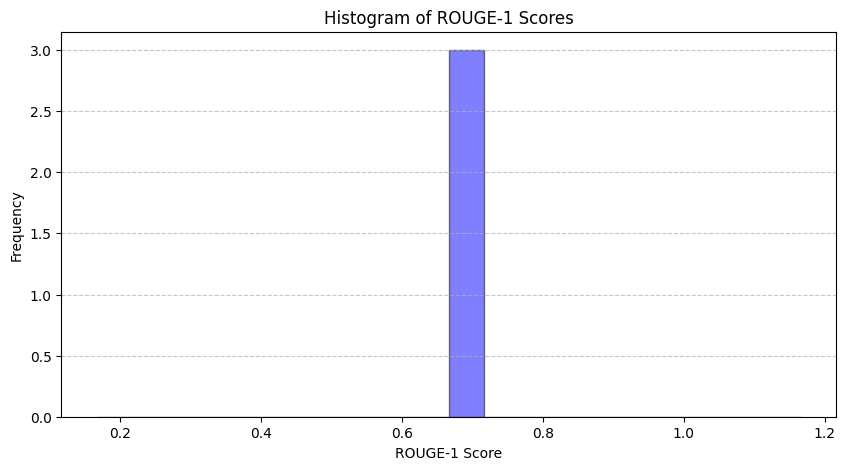

In [ ]:
# Create histograms for ROUGE-1
rouge1_scores = [score for score in average_rouge_scores["rouge1"].values()]
create_histogram(rouge1_scores, "1")

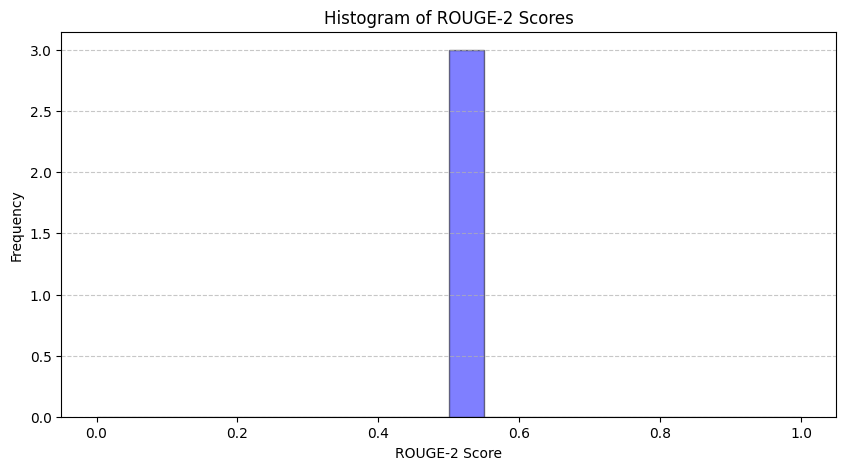

In [ ]:
# Create histograms for ROUGE-2
rouge2_scores = [score for score in average_rouge_scores["rouge2"].values()]
create_histogram(rouge2_scores, "2")

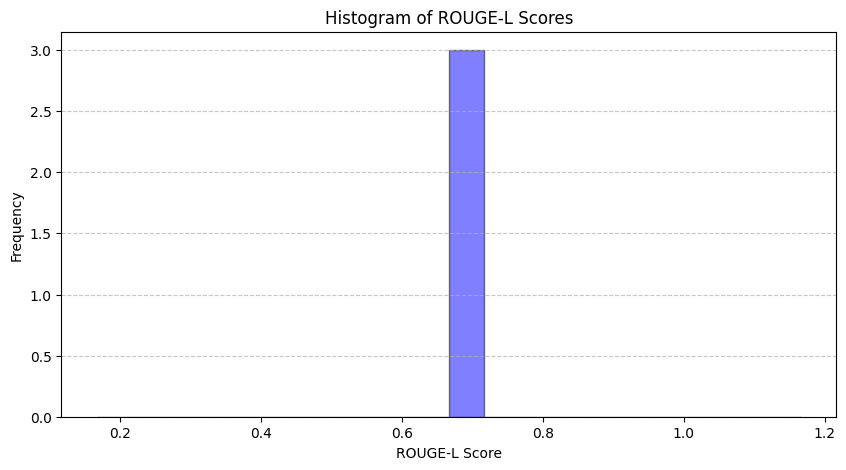

In [ ]:
# Create histograms for ROUGE-L
rougeL_scores = [score for score in average_rouge_scores["rougeL"].values()]
create_histogram(rougeL_scores, "L")

In [ ]:
# Combine the ROUGE scores for ROUGE-1, ROUGE-2, and ROUGE-L
rouge1_scores = [score for score in average_rouge_scores["rouge1"].values()]
rouge2_scores = [score for score in average_rouge_scores["rouge2"].values()]
rougeL_scores = [score for score in average_rouge_scores["rougeL"].values()]

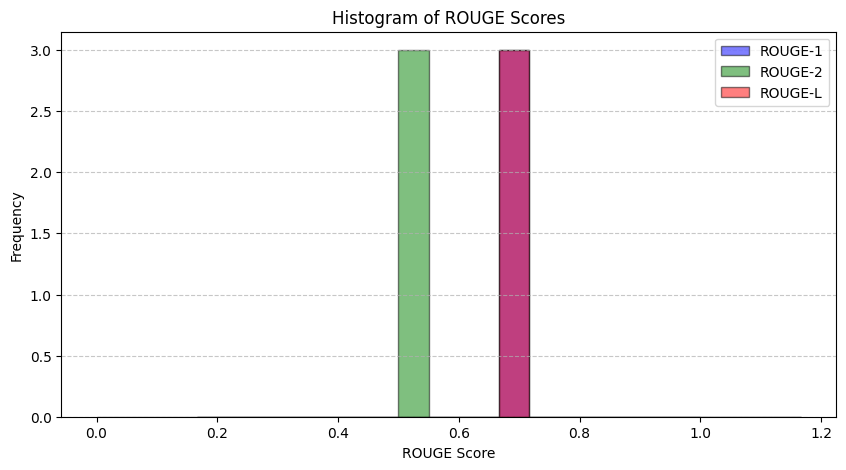

In [ ]:
# Create a histogram with different colors for each metric
plt.figure(figsize=(10, 5))
plt.hist(rouge1_scores, bins=20, alpha=0.5, color='blue', label='ROUGE-1', edgecolor='black')
plt.hist(rouge2_scores, bins=20, alpha=0.5, color='green', label='ROUGE-2', edgecolor='black')
plt.hist(rougeL_scores, bins=20, alpha=0.5, color='red', label='ROUGE-L', edgecolor='black')

plt.title("Histogram of ROUGE Scores")
plt.xlabel("ROUGE Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()